# GPS - Aufgabenblatt 1: Ein Modell zur Positionsbestimmung
## Einleitung
GPS ist ein globales Navigationssatellitensystem zur Positionsbestimmung, welches mittlerweile in vielen Bereichen eingesetzt wird. Sei es im Navi, um von $A$ nach $B$ zu kommen oder bei einer Handy App, die einem sagt, wann der nächste Bus kommt. Hinter allen Anwendungen steckt die Bestimmung der aktuellen Position. Aber wie funktioniert das?
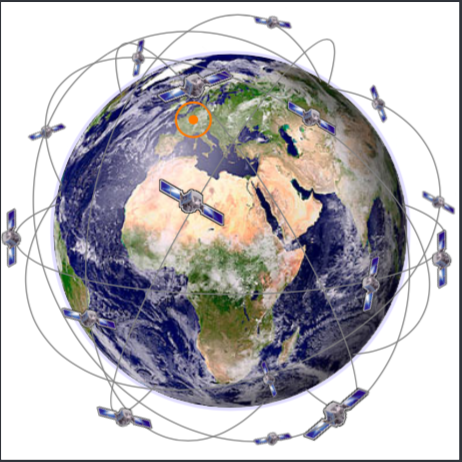
### Die Idee hinter GPS
Mehrere Satelliten umkreisen in ca. 20000 km Höhe die Erde und senden jede Millisekunde eine Nachricht mit ihrer aktuellen Zeit. Dazu verfügen die Satelliten über eine eingebaute Atomuhr. Da die Nachricht mit Lichtgeschwindigkeit (299792458 $\frac{m}{s}$) geschickt wird, werden zwischen 65 und 90 Millisekunden benötigt, um auf der Erde empfangen zu werden. Die Übertragungsdauer hängt von der Entfernung zwischen dem Empfänger und dem Satelliten ab.

Durch Vergleich der Sendezeit mit der Empfangszeit kann unter Verwendung der bekannten Übertragungsgeschwindigkeit der Nachricht die sogenannte **Pseudoentfernung** zum Satelliten berechnet werden. Mit drei Satelliten lässt sich dann die Position des Empfängers auf der Erde bestimmen.
### Problembeschreibung: Bestimmen der Empfängerposition
Zur Bearbeitung dieses Blattes liegen verschiedene Satellitendatensätze vor. Im Folgenden kannst du dir einen dieser Datensätze aussuchen. Anschließend sollst du die zu diesem Datensatz gehörige Position auf der Erde bestimmen. Dies geschieht in mehreren Schritten, durch die dich dieses Aufgabenblatt führt. 

*Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).*

In [2]:
% Hier nichts ändern
addpath("./code/OctaveFunctions")

## Einlesen der Satellitendaten
Du hast drei Satellitendatensätze zur Auswahl. Wähle einen aus und lese dessen Daten ein. Mit den eingelesenen Daten kann anschließend die Position des Empfängers bestimmt werden.

*Ersetze im folgenden Code `NaN` durch den Namen des Satellitendatensatzes mit dem du arbeiten möchtest. Klicke danach auf den "Run" Button (oder drücke Shift + Enter). Die Daten werden daraufhin eingelesen. Das kann etwas dauern. Anschließend werden dir die Ergebnisse angezeigt.* 

In [3]:
% Diese drei Datensätze stehen zur Auswahl (nicht ändern)
DatensatzA = {'./RINEXDateien/114255.obs','./RINEXDateien/114255.nav'};
DatensatzK1 = {'./RINEXDateien/090405.obs','./RINEXDateien/090405.nav'};
DatensatzK2= {'./RINEXDateien/135700.obs','./RINEXDateien/135700.nav'};  

% Einlesen der Daten
Satellitendaten = einlesen_Satellitendaten(DatensatzK2);% Ersetze NaN durch den gewünschten Datensatz (DatensatzA, DatensatzK1 oder DatensatzK2)
[Satelliten,Satellitenauswahl,Wochen,tE,tS,Signalstaerken,Ephemeriden] = show_data(Satellitendaten,[1 2 3]);
[SK_MU,dS_MU,SP_MU,GK_MU] = analyse_Satellitendaten(tE,tS,Ephemeriden);

Lese Rinex Datei ... : ./RINEXDateien/135700.obs
Lese Rinex Datei ... : ./RINEXDateien/135700.nav
Satelliten =

  1  2  3  4  5  6

Satellitenauswahl =

  1  2  3

Wochen =

   2001.00   2001.00   2001.00

tE =

   136639.00   136639.00   136639.00

tS =

   136638.92   136638.92   136638.93

Signalstaerken =

   0.00   0.00   0.00

Ephemeriden =

        1.62       -2.00        1.67
        0.00        0.00        0.00
        0.02        0.01        0.01
     5153.70     5153.81     5153.64
       -2.55       -0.42        1.69
        0.94        0.94        0.97
       -1.56       -2.37        0.86
       -0.00       -0.00       -0.00
        0.00       -0.00       -0.00
        0.00       -0.00       -0.00
        0.00        0.00        0.00
      185.59      124.56      350.56
       38.75       -7.25      -55.94
        0.00        0.00       -0.00
       -0.00       -0.00        0.00
   136800.00   136784.00   136800.00
       -0.00       -0.00       -0.00
        0.00        0

Beim Anzeigen der Ergebnisse gelten die folgenden Notationen:
- **Satelliten** = Zeilenvektor, der alle Satelliten enthält, dessen Nachrichten empfangen wurden
- **Satellitenauswahl** = Zeilenvektor, der die drei Satelliten enthält, die im Folgenden zur Positionsberechnung benutzt werden
- **Wochen** = Zeilenvektor mit den Nummern der Wochen, in denen die drei ausgewählten Satelliten ihre Nachrichten geschickt haben
- **tE** = Zeilenvektor mit den Empfangszeiten der drei Nachrichten in Sekunden seit Wochenbeginn
- **tS** = Zeilenvektor mit den Sendezeiten der drei Nachrichten in Sekunden seit Wochenbeginn
- **Signalstaerken** = Zeilenvektor mit den Signalstaerken der drei Nachrichten in dBHz
- **Ephemeriden** = Matrix mit Positionsdaten, aus denen sich die Bahnkurven der drei Satelliten bestimmen lassen

## Schritt 1: Berechnung der Satellitenkoordinaten
Die Bahnkurven der Satelliten lassen sich durch bestimmte Positionsdaten berechnen, die man **Ephemeriden** nennt und die mit jeder Nachricht übertragen werden. Die Positionsdaten unserer drei Satelliten sind in der Matrix `Ephemeriden` hinterlegt (s.o.).  Mit der Funktion

`berechne_Satellitenkoordinaten(t,Ephemeriden)` 

lassen sich durch Angabe der Zeit $t$, die Positionen der Satelliten zu dieser Zeit $t$ berechnen. Dabei ist $t = [t_1 \ t_2 \ t_3]$ ein Vektor, dessen i-ter Eintrag die Zeit angibt, zu der die Position des i-ten Satelliten berechnet werden soll. Du sollst nun die Koordinaten der drei Satelliten zum für die Positionsbestimmung relevanten Zeitpunkt bestimmen, indem du diese Funktion mit dem richtigen $t$ aufrufst.

*Ersetze im folgendne Code `NaN` durch einen geeigneten Zeit-Vektor, sodass du die Koordinaten der drei Satelliten zur  relevanten Zeit erhälst. Drücke danach auf den "Run" Button. Wenn du alles richtig gemacht hast, bekommst du die gesuchten Koordinaten angezeigt. Anderenfalls bekommst du eine Fehlermeldung.*

In [98]:
% Berechnung der Satellitenkoordinaten
SK = berechne_Satellitenkoordinaten(tS,Ephemeriden);% Ersetze NaN durch einen geeigneten Zeit-Vektor
% Prüfen der Lösung (hier nichts ändern)
pruefe_Satellitenkoordinaten(SK,SK_MU); 

SK =

   26392476.70   -7658691.84   16751403.80
    2688964.62  -15131519.01   16166212.43
    1836205.48   20632607.75   12820818.63



Wie du siehst, werden die Positionen der Satelliten in einer Matrix namens `SK` gespeichert. Dabei gehört die i-te Spalte zum i-ten Satelliten (i = 1,2,3). Die 1. Zeile enthält die x-Koordinaten in Metern, die 2. Zeile die y-Koordinaten in Metern und die 3. Zeile die z-Koordinaten in Metern. 

## Schritt 2: Berechnung der Pseudoentfernungen
Mithilfe der Sende- und Empfangszeiten kann man den Abstand zwischen Sender, also dem Satelliten, und Empfänger berechnen. Schließlich ist die Ausbreitungsgeschwindigkeit der Nachrichten bekannt. Du sollst nun eine Funktion schreiben, die unter Verwendung der Vektoren $tS$ und $tE$ die Abstände des Empfängers zu den drei Satelliten berechnet. Die auf diese Weise berechneten Abstände heißen **Pseudoentfernungen**.

*Ersetze im folgenden Code das erste `NaN` durch die Ausbreitungsgeschwindigkeit der Nachrichten. Ersetze das zweite `NaN` durch eine Formel in $tS$, $tE$ und $c$, welche die gesuchten Pseudoentfernungen berechnet. Drücke anschließend auf den "Run" Button. Wenn du alles richtig gemacht hast, bekommst du die Pseudoentfernungen angezeigt. Sonst bekommst du eine Fehlermeldung.*

**Hinweis: Bei einer Formel müssen alle Variablen hinter dem @-Zeichen benutzt werden. Sie werden beim Aufrufen der Funktion übergeben. Alle Variablen, die nicht hinter dem @-Zeichen aufgeführt sind, werden als Konstanten betrachtet.**

In [99]:
% Aufstellen der Berechnungsformel
c = 299792458;% Ersetze NaN durch die Ausbreitungsgeschwindigkeit der Nachrichten in m/s
berechne_Pseudoentfernungen = @(tS,tE) (tE-tS) * c;% Ersetze NaN durch eine Formel in tS, tE und c, welche die Pseudoentfernungen berechnet

% Berechnung der Pseudoentfernungen (hier nichts ändern)
dS = berechne_Pseudoentfernungen(tS,tE);
pruefe_Pseudoentfernungen(dS, dS_MU);

dS =

   22819413.01   25491151.91   21908834.36



Wenn du alles richtig gemacht hast, werden die Pseudoentfernungen in Metern im Zeilenvektor `dS` gespeichert. Der i-te Eintrag gehört zum i-ten Satelliten (i = 1,2,3).

## Schritt 3: Berechnung der Empfängerkoordinaten
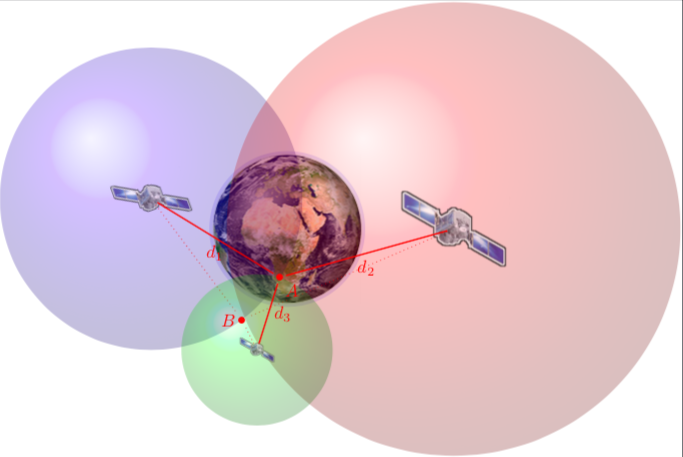
Nun kennen wir also bereits die Position der drei Satelliten im Weltall sowie die jeweiligen Entfernungen dieser Satelliten zum Empfänger auf der Erde. Mit diesen Informationen können wir ein Gleichungssystem aufstellen, dessen Lösung uns die Position des Empfängers liefert. Seien dazu 
- $x_E$ = x-Koordinate des Empfängers
- $y_E$ = y-Koordinate des Empfängers
- $z_E$ = z_Koordinate des Empfängers

die drei unbekannten in unserem Gleichungssystem. Um alle drei Unbekannten zu bestimmen brauchen wir drei Gleichungen -  eine pro Satellit.

Bestimme - zunächst auf dem Papier - eine Gleichung für den ersten Satelliten. Sie sollte die bekannten Satellitenkoordinaten $SK(1,1)$, $SK(2,1)$ und $SK(3,1)$, die bekannte Pseudoentfernung $dS(1)$ und die unbekannten Empfängerkoordinaten $x_E$, $y_E$ und $z_E$ enthalten. Stelle danach Gleichungen für den zweiten und dritten Satelliten analog auf.

Das Gleichungssystem lassen wir automatisch in Octave lösen, indem wir es als Nullstellenproblem formulieren. Forme dazu jede der drei Gleichungen so um, dass "hinter" dem Gleichheitszeichen eine Null steht und "vor" dem Gleichheitszeichen ein Term der Null ergibt. Trage die auf diese Weise erhaltenen drei Terme (ohne Gleichheitszeichen und Nullen) anstelle der drei `NaN` im folgendne Code ein.
	
*Ersetze im folgenden Code jeweils ein `NaN` durch einen der drei Terme, die du auf oben beschriebene Weise erhalten hast. Die Reihenfolge spielt dabei keine Rolle. Drücke anschließend auf den "Run" Button. Wenn du alles richtig gemacht hast, bekommst du die Koordinaten des Empfängers ausgegeben.*

**Beispiel zur Eingabe von Gleichungssystemen: Das Gleichungssystem
{$x^2-5=y, \ x-\sqrt{y} = 1$}
muss wie folgt eingegeben werden:**

`Gleichungssystem = @(x,y) [x^2-5-y
                           x-sqrt(y)-1];`
                           
**Falls du Hilfe benötigst, kannst du dir hier [Hilfekarte 1](./GPSHilfekarte1.ipynb) ansehen.**

In [100]:
% Aufstellen des Gleichungssystems
Gleichungssystem = @(xE,yE,zE)[
        sqrt((SK(1,1)-xE)^2+(SK(2,1)-yE)^2+(SK(3,1)-zE)^2)-dS(1)% Ersetze NaN durch einen der drei Terme "vor" dem Gleichheitszeichen
        sqrt((SK(1,2)-xE)^2+(SK(2,2)-yE)^2+(SK(3,2)-zE)^2)-dS(2)% Ersetze NaN durch einen der drei Terme "vor" dem Gleichheitszeichen
        sqrt((SK(1,3)-xE)^2+(SK(2,3)-yE)^2+(SK(3,3)-zE)^2)-dS(3)];% Ersetze NaN durch einen der drei Terme "vor" dem Gleichheitszeichen

% Definiere Funktion und Startpunkt für fsolve (ab hier nichts mehr ändern)
Funktion = @(X) Gleichungssystem(X(1),X(2),X(3));

% Startpunkt berechnen
SP = trilaterate(SK(:,1),SK(:,2),SK(:,3),dS(1),dS(2),dS(3));

% Berechnen einer Loesung in der Naehe des Startpunktes
options = optimset('TolX', 1e-10,'TolFun',1e-10,'MaxIter', 1000);
[X,fval,info,iterations] = fsolve(Funktion,SP,options);

% Speichern und Ausgeben der berechneten Loesung
xE = X(1);
yE = X(2);
zE = X(3);
pruefe_Empfaengerkoordinaten(xE,yE,zE,SP_MU);

xE =  3789549.74
yE =  711025.70
zE =  4269528.36


Wenn das Gleichungssystem erfolgreich gelöst werden konnte, bekommst du die Lösung oben angezeigt. Diese ist wieder in Metern und bezieht sich auf das Kartesische Koordinatensystem.

## Schritt 4: Umrechnen in geographische Höhe, Breite und Länge
Um sich die Position des Empfängers auf einer Karte anzeigen zu lassen (beispielsweise in Google Maps), müssen die Kartesischen Koordinaten $x_E$, $y_E$ und $z_E$ in geographische Koordinaten umgerechnet werden. Diese bestehen aus geografischer Breite $\phi$ (*phi*), geografischer Länge $\lambda$ (*lambda*) und der Höhe über (oder unter) der Erdoberfläche $h$.
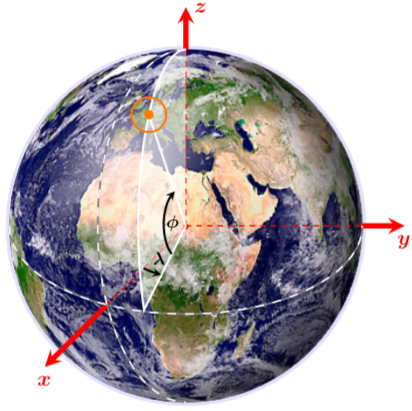
Modelliere dazu die Erde durch eine Kugel, deren Radius dem Äquatorradius der Erde entspricht, und bestimme auf Basis dieses Modells die Formeln mit denen die Höhe $h$, die geographische Breite $\phi$ bzw. die geografische Länge $\lambda$ aus den bekannten Größen $x_E$, $y_E$ und $z_E$ berechnet werden können. 

*Ersetze im folgenden Code die `NaNs` durch Formeln in $x_E$, $y_E$ und $z_E$, mit denen sich die Höhe $h$, die Breite $\phi$ bzw. die Länge $\lambda$ berechnen lassen. Drücke danach auf den "Run" Button. Wenn du alles richtig gemacht hast, bekommst du das Ergebnis angezeigt.*

**Hinweis: Die beiden Winkel $\phi$ und $\lambda$ müssen in der Einheit Grad (und nicht im Bogenmaß) bestimmt werden.** 

**Falls du Hilfe benötigst, kannst du dir hier [Hilfekarte 2](./GPSHilfekarte2.ipynb) ansehen.**

In [101]:
% Aufstellen der Umrechnungsformeln
berechne_h      = @(xE,yE,zE) sqrt(xE^2+yE^2+zE^2)-6378137.0;% Ersetze NaN durch eine Formal, mit der sich die Höhe h berechnen lässt
berechne_phi    = @(xE,yE,zE) atan(zE/sqrt(xE^2+yE^2))*180/pi;% Ersetze NaN durch eine Formal, mit der sich die geografische Breite berechnen lässt
berechne_lambda = @(xE,yE,zE) atan2(yE,xE)*180/pi;% Ersetze NaN durch eine Formal, mit der sich die geografische Länge berechnen lässt

% Berechnung der geographischen Koordinaten (ab hier nichts mehr ändern)
h = berechne_h(xE,yE,zE);
phi = berechne_phi(xE,yE,zE);
lambda = berechne_lambda(xE,yE,zE);

% Ueberpruefung und Ausgabe der geographischen Koordinaten
pruefe_geoKoordinaten(h,phi,lambda,GK_MU);

h = -625301.43
phi =  47.92
lambda =  10.63


## Empfängerposition auf Karte anzeigen
Ein Bild sagt mehr als tausend Zahlen - das gilt auch für die von uns berechneten Koordinten. Daher wollen wir uns nun die Position des Empfängers auf der Karte ansehen. Hast du bereits eine Idee, wo der Empfänger sich aufhält?

*Führe den folgenden Code aus. Daraufhin bekommst du eine URL angezeigt, die du anklicken kannst, um Google Maps mit den richtigen Koordinaten zu öffnen. Sollte der Link nicht funktionieren, kopiere die URL in deinen Web Browser.*

In [102]:
% Auswaehlen des Kartenausschnitts
Kartenausschnitt_manuell = true;
Zentrum = '50.5,6.8';
Zoom = '8';

% Erzeugen der URL
url = sprintf('https://www.google.de/maps/place/%f,%f',phi,lambda);
if Kartenausschnitt_manuell
    url = [url '/@' Zentrum ',' Zoom 'z'];
end

% Anzeigen der URL im Browser
display(url)

url = https://www.google.de/maps/place/47.915799,10.626741/@50.5,6.8,8z
